In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
#imporitng the data set using read_spss command
df =  pd.read_spss('secom_mod.SAV')

In [17]:
#Splitting the dataset to Test and Train
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

X = df.drop(['class'], axis= 1)
y = df['class']


X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.3,stratify=y, random_state=42)
X_train = X_train.copy()

pd.set_option('display.max_columns', None)

In [18]:
#making the class as categorical value

y_train = y_train.astype('category')
assert y_train.dtype == 'category'

In [19]:
#dropping the timestamp column as it is not used for modelling

X_train = X_train.drop(['ID', 'timestamp'],axis = 1)

In [22]:
X_train1 = X_train.drop(X_train.columns[X_train.apply(lambda col: col.isnull().sum()/len(df) > 0.55)], axis=1)

In [23]:
X_train2 = X_train1.drop(X_train1.columns[X_train1.apply(lambda col: col.nunique()) == 1],axis=1)

In [24]:
def outlier_detection_and_replacement(DataSet):
    DataSet.fillna(0)
    Q1 = DataSet.quantile(0.25)
    Q3 = DataSet.quantile(0.75)
    IQR = Q3 - Q1

    DataSet[(DataSet < (Q1 - 1.5 * IQR)) | (DataSet > (Q3 + 1.5 * IQR))] = np.nan
    return DataSet

In [25]:
X_train3 = outlier_detection_and_replacement(X_train2)

In [26]:
#MICE imputation

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer
MICE_imputer = IterativeImputer() 
X_train3_filled = X_train3.copy(deep = True)
X_train3_filled.iloc[:, :] = MICE_imputer.fit_transform(X_train3_filled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [27]:
X_train3_filled.shape

(1096, 466)

In [28]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor

In [29]:
dtree = DecisionTreeRegressor()

In [54]:
X1 = X_train3_filled 
Y1 = y_train.dropna()

In [55]:
rfecv = RFECV(estimator=dtree, step=1, scoring="neg_mean_squared_error", cv=4, verbose=1,n_jobs = 4)

rfecv.fit(X1 ,Y1)

rfecv.transform(X1)


Fitting estimator with 466 features.
Fitting estimator with 465 features.
Fitting estimator with 464 features.
Fitting estimator with 463 features.
Fitting estimator with 462 features.
Fitting estimator with 461 features.
Fitting estimator with 460 features.
Fitting estimator with 459 features.
Fitting estimator with 458 features.
Fitting estimator with 457 features.
Fitting estimator with 456 features.
Fitting estimator with 455 features.
Fitting estimator with 454 features.
Fitting estimator with 453 features.
Fitting estimator with 452 features.
Fitting estimator with 451 features.
Fitting estimator with 450 features.
Fitting estimator with 449 features.
Fitting estimator with 448 features.
Fitting estimator with 447 features.
Fitting estimator with 446 features.
Fitting estimator with 445 features.
Fitting estimator with 444 features.
Fitting estimator with 443 features.
Fitting estimator with 442 features.
Fitting estimator with 441 features.
Fitting estimator with 440 features.
F

Fitting estimator with 244 features.
Fitting estimator with 243 features.
Fitting estimator with 242 features.
Fitting estimator with 241 features.
Fitting estimator with 240 features.
Fitting estimator with 239 features.
Fitting estimator with 238 features.
Fitting estimator with 237 features.
Fitting estimator with 236 features.
Fitting estimator with 235 features.
Fitting estimator with 234 features.
Fitting estimator with 233 features.
Fitting estimator with 232 features.
Fitting estimator with 231 features.
Fitting estimator with 230 features.
Fitting estimator with 229 features.
Fitting estimator with 228 features.
Fitting estimator with 227 features.
Fitting estimator with 226 features.
Fitting estimator with 225 features.
Fitting estimator with 224 features.
Fitting estimator with 223 features.
Fitting estimator with 222 features.
Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
F

Fitting estimator with 19 features.


array([[ 9.77600000e-01, -3.76475000e+03,  1.79627000e+01, ...,
         1.18690000e+00,  3.34310000e+00,  2.05500000e-01],
       [ 9.70600000e-01, -3.78700000e+03,  2.18509000e+01, ...,
         7.67400000e-01,  1.58850000e+00,  3.50900000e-01],
       [ 9.69575695e-01, -3.54250000e+03,  2.53355000e+01, ...,
         1.15250000e+00,  2.94450000e+00,  4.00400000e-01],
       ...,
       [ 9.77900000e-01, -4.29750000e+03,  1.81100000e+01, ...,
         5.87000000e-01,  5.01190000e+00,  2.20900000e-01],
       [ 9.77900000e-01, -4.99975000e+03,  2.63191000e+01, ...,
         7.40800000e-01,  3.42650000e+00,  5.13300000e-01],
       [ 9.78900000e-01, -3.81175000e+03,  1.79682000e+01, ...,
         5.31700000e-01,  5.53210000e+00,  2.49700000e-01]])

In [56]:
print(rfecv)

RFECV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=4,
      scoring='neg_mean_squared_error', verbose=1)


In [57]:
print(rfecv.n_features_)

18


In [58]:
rfecv

RFECV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=4,
      scoring='neg_mean_squared_error', verbose=1)

In [60]:
rfecv.n_features_

18

In [62]:
print(f"Number of selected features: {rfecv.n_features_}\n\
Mask: {rfecv.n_features_}\n\
Selected Features:", [feature for feature, rank in zip(X1.columns.values, rfecv.ranking_) if rank==1])

Number of selected features: 18
Mask: 18
Selected Features: ['feature018', 'feature024', 'feature065', 'feature084', 'feature101', 'feature103', 'feature109', 'feature118', 'feature122', 'feature214', 'feature378', 'feature391', 'feature424', 'feature426', 'feature427', 'feature442', 'feature540', 'feature574']


In [63]:
X1_RFE = X1[['feature018', 'feature024', 'feature065', 'feature084', 'feature101', 'feature103', 'feature109', 'feature118', 'feature122', 'feature214', 'feature378', 'feature391', 'feature424', 'feature426', 'feature427', 'feature442', 'feature540', 'feature574']]

In [65]:
X1_RFE.shape

(1096, 18)

In [66]:
#importing SMOTE

from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X1_RFE, Y1)

print(f'''Shape of X before SMOTE: {X1_RFE.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (1096, 18)
Shape of X after SMOTE: (2060, 18)

Balance of positive and negative classes (%):


0.0    50.0
1.0    50.0
Name: class, dtype: float64

In [105]:
#Feature selection based on RFE (Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [106]:
lin_reg = LinearRegression()

In [111]:
rfe = RFE(lin_reg, 18) # selecting best 80 features for the model 
rfe.fit(X1, Y1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


RFE(estimator=LinearRegression(), n_features_to_select=18)

In [125]:
print(f"Number of selected features: {rfe.n_features_}\n\
Mask: {rfe.support_}\n\
Selected Features:", [feature for feature, rank in zip(X1.columns.values, rfe.ranking_) if rank==1],"\n\
Estimator : {rfe.estimator_}")

Number of selected features: 18
Mask: [False False False False False False False False False False False  True
 False False  True False  True False False False False False False False
 False False False False False False False False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False 

In [126]:
X4_RFE = X1[['feature013', 'feature017', 'feature019', 'feature035', 'feature037', 'feature096', 'feature175', 'feature177', 'feature199', 'feature204', 'feature220', 'feature311', 'feature313', 'feature336', 'feature341', 'feature360', 'feature392', 'feature547']]

In [127]:
X4_RFE

,feature013,feature017,feature019,feature035,feature037,feature096,feature175,feature177,feature199,feature204,feature220,feature311,feature313,feature336,feature341,feature360,feature392,feature547
292,199.3001,10.6140,188.6861,50.2150,49.7850,0.000200,0.2871,0.2952,0.314,30.861,0.0023,0.3229,0.091500,2.56080,0.060300,0.0145,0.0082,0.977381
1416,197.3447,9.6066,187.7381,50.4775,49.5225,0.000000,0.2536,0.1599,1.109,21.704,0.0038,0.2241,0.120300,2.01510,0.054000,0.0136,0.0169,1.079800
385,201.8757,10.5391,191.3366,50.3421,49.6579,-0.000100,0.4484,0.2476,1.032,23.416,0.0034,0.2548,0.102600,2.18570,0.045600,0.0131,0.0104,0.951600
272,199.4865,9.6426,189.8439,50.3999,49.6001,0.000037,0.3812,0.2063,0.306,39.334,0.0026,0.3151,0.095600,3.54080,0.103400,0.0133,0.0057,1.132208
667,197.7375,9.9427,187.7949,50.1240,49.8760,0.000100,0.1596,0.2124,0.334,31.313,0.0035,0.2088,0.112567,1.87540,0.096431,0.0099,0.0051,1.533100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,197.3174,10.3602,186.9571,50.2488,49.7512,0.000000,0.2765,0.3665,0.273,30.764,0.0025,0.2964,0.073400,2.70070,0.095800,0.0123,0.0108,1.171100
397,201.0235,10.5411,190.4824,50.3716,49.6284,0.000100,0.3412,0.2813,0.412,29.119,0.0041,0.3534,0.065800,2.59890,0.059300,0.0133,0.0092,0.998271
876,199.2838,9.7225,189.5613,50.5598,49.4402,0.000000,0.2865,0.2337,0.317,36.283,0.0024,0.3104,0.173700,2.25350,0.031300,0.0222,0.0075,1.477812
323,200.2615,10.2695,189.9920,50.2667,49.7334,0.000000,0.3157,0.2739,0.519,20.504,0.0036,0.3085,0.095400,2.75270,0.053800,0.0166,0.0126,0.690800


In [117]:
#importing SMOTE

from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X1_sm, y1_sm = sm.fit_resample(X4_RFE, Y1)

print(f'''Shape of X before SMOTE: {X4_RFE.shape}
Shape of X after SMOTE: {X1_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (1096, 18)
Shape of X after SMOTE: (2060, 18)

Balance of positive and negative classes (%):


0.0    50.0
1.0    50.0
Name: class, dtype: float64

TEST DATA

In [67]:
#dropping the timestamp column as it is not used for modelling

X_test = X_test.drop(['ID', 'timestamp'],axis = 1)

In [68]:
#making the class as categorical value

y_test = y_test.astype('category')
assert y_test.dtype == 'category'

In [69]:
X_test1 = X_test.drop(X_test.columns[X_test.apply(lambda col: col.isnull().sum()/len(df) > 0.55)], axis=1)
X_test1

,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,feature009,feature010,feature011,feature012,feature013,feature014,feature015,feature016,feature017,feature018,feature019,feature020,feature021,feature022,feature023,feature024,feature025,feature026,feature027,feature028,feature029,feature030,feature031,feature032,feature033,feature034,feature035,feature036,feature037,feature038,feature039,feature040,feature041,feature042,feature043,feature044,feature045,feature046,feature047,feature048,feature049,feature050,feature051,feature052,feature053,feature054,feature055,feature056,feature057,feature058,feature059,feature060,feature061,feature062,feature063,feature064,feature065,feature066,feature067,feature068,feature069,feature070,feature071,feature072,feature073,feature074,feature075,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature084,feature085,feature086,feature087,feature088,feature089,feature090,feature091,feature092,feature093,feature094,feature095,feature096,feature097,feature098,feature099,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature142,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature150,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature179,feature180,feature181,feature182,feature183,feature184,feature185,feature186,feature187,feature188,feature189,feature190,feature191,feature192,feature193,feature194,feature195,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207,feature208,feature209,feature210,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature221,feature222,feature223,feature224,feature225,feature226,feature227,feature228,feature229,feature230,feature231,feature232,feature233,feature234,feature235,feature236,feature237,feature238,feature239,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature257,feature258,feature259,feature260,feature261,feature262,feature263,feature264,feature265,feature266,feature267,feature268,feature269,feature270,feature271,feature272,feature273,feature274,feature275,feature276,feature277,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature285,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature293,feature294,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309,feature310,feature311,feature312,feature313,feature314,feature315,feature316,feature317,feature318,feature319,feature320,feature321,feature322,feature323,feature324,feature325,feature326,feature327,feature328,feature329,feature330,feature331,feature332,feature333,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature359,feature360,feature361,feature362,feature363,featur

In [70]:
X_test2 = X_test1.drop(X_test1.columns[X_test1.apply(lambda col: col.nunique()) == 1],axis=1)
X_test2

,feature001,feature002,feature003,feature004,feature005,feature007,feature008,feature009,feature010,feature011,feature012,feature013,feature015,feature016,feature017,feature018,feature019,feature020,feature021,feature022,feature023,feature024,feature025,feature026,feature027,feature028,feature029,feature030,feature031,feature032,feature033,feature034,feature035,feature036,feature037,feature038,feature039,feature040,feature041,feature042,feature044,feature045,feature046,feature047,feature048,feature049,feature051,feature052,feature054,feature055,feature056,feature057,feature058,feature059,feature060,feature061,feature062,feature063,feature064,feature065,feature066,feature067,feature068,feature069,feature071,feature072,feature073,feature074,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature084,feature085,feature086,feature087,feature088,feature089,feature090,feature091,feature092,feature093,feature094,feature095,feature096,feature097,feature099,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature181,feature182,feature183,feature184,feature185,feature186,feature188,feature189,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature208,feature209,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature221,feature222,feature223,feature224,feature225,feature226,feature228,feature229,feature239,feature240,feature245,feature246,feature247,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature268,feature269,feature270,feature271,feature272,feature273,feature274,feature275,feature276,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature293,feature294,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309,feature310,feature311,feature312,feature313,feature317,feature318,feature319,feature320,feature321,feature322,feature324,feature325,feature332,feature333,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature344,feature345,feature346,feature347,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature359,feature360,feature361,feature362,feature363,feature364,feature366,feature367,feature368,feature369,feature377,feature378,feature383,feature384,feature385,feature386,feature387,feature388,feature389,feature390,feature391,feature392,feature393,feature394,feature406,feature407,feature408,feature409,feature410,feature411,feature412,feature413,feature414,feature416,feature417,feature418,feature419,feature420,feature421,feature422,feature424,feature425,feature426,feature427,feature428,feature429,feature430,feature431,feature432,feature433,feature434,feature435,feature436,feature437,feature438,feature439,feature440,feature441,feature442,feature443,feature444,feature445,feature446,feature447,feature448,featur

In [71]:
#:: OUTLIERS HANDLING ::
X_test3 = outlier_detection_and_replacement(X_test2)

In [72]:
#MICE imputation

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer
MICE_imputer = IterativeImputer() 
X_test3_filled = X_test3.copy(deep = True)
X_test3_filled.iloc[:, :] = MICE_imputer.fit_transform(X_test3_filled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [73]:
X_test3_filled.shape

(471, 468)

In [74]:
#dropping the ID column and assigning the test values

X2 = X_test3_filled
Y2 = y_test.dropna()

In [88]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor

In [89]:
dtree = DecisionTreeRegressor()

In [90]:
rfecv = RFECV(estimator=dtree, step=1, scoring="neg_mean_squared_error", cv=4, verbose=1,n_jobs = 4)

rfecv.fit(X2 ,Y2)

rfecv.transform(X2)

Fitting estimator with 468 features.
Fitting estimator with 467 features.
Fitting estimator with 466 features.
Fitting estimator with 465 features.
Fitting estimator with 464 features.
Fitting estimator with 463 features.
Fitting estimator with 462 features.
Fitting estimator with 461 features.
Fitting estimator with 460 features.
Fitting estimator with 459 features.
Fitting estimator with 458 features.
Fitting estimator with 457 features.
Fitting estimator with 456 features.
Fitting estimator with 455 features.
Fitting estimator with 454 features.
Fitting estimator with 453 features.
Fitting estimator with 452 features.
Fitting estimator with 451 features.
Fitting estimator with 450 features.
Fitting estimator with 449 features.
Fitting estimator with 448 features.
Fitting estimator with 447 features.
Fitting estimator with 446 features.
Fitting estimator with 445 features.
Fitting estimator with 444 features.
Fitting estimator with 443 features.
Fitting estimator with 442 features.
F

Fitting estimator with 244 features.
Fitting estimator with 243 features.
Fitting estimator with 242 features.
Fitting estimator with 241 features.
Fitting estimator with 240 features.
Fitting estimator with 239 features.
Fitting estimator with 238 features.
Fitting estimator with 237 features.
Fitting estimator with 236 features.
Fitting estimator with 235 features.
Fitting estimator with 234 features.
Fitting estimator with 233 features.
Fitting estimator with 232 features.
Fitting estimator with 231 features.
Fitting estimator with 230 features.
Fitting estimator with 229 features.
Fitting estimator with 228 features.
Fitting estimator with 227 features.
Fitting estimator with 226 features.
Fitting estimator with 225 features.
Fitting estimator with 224 features.
Fitting estimator with 223 features.
Fitting estimator with 222 features.
Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
F

array([[ 10.3807, 113.2445,  21.8473, ...,  40.3777,   4.5418,   1.5881],
       [ 10.3975, 120.0645,   8.2464, ...,  51.7585,   5.2004,   0.7294],
       [ 10.3348, 121.4027,   7.9109, ...,  27.0176,   3.6251,   1.8156],
       ...,
       [ 10.2923, 114.4536,  12.5955, ...,  78.8578,   4.6012,   1.1489],
       [ 10.7023, 113.4073,  14.3136, ...,  45.5617,   3.534 ,   0.4389],
       [  9.8552, 124.8709,   9.5452, ...,  53.6194,   5.1386,   0.5786]])

In [81]:
print(f"Number of selected features: {rfecv.n_features_}\n\
Mask: {rfecv.n_features_}\n\
Selected Features:", [feature for feature, rank in zip(X2.columns.values, rfecv.ranking_) if rank==1])

Number of selected features: 207
Mask: 207
Selected Features: ['feature062', 'feature063', 'feature064', 'feature065', 'feature066', 'feature067', 'feature068', 'feature069', 'feature071', 'feature072', 'feature073', 'feature074', 'feature076', 'feature077', 'feature078', 'feature079', 'feature080', 'feature081', 'feature082', 'feature083', 'feature084', 'feature085', 'feature086', 'feature087', 'feature088', 'feature089', 'feature090', 'feature091', 'feature092', 'feature093', 'feature094', 'feature095', 'feature096', 'feature097', 'feature099', 'feature100', 'feature101', 'feature102', 'feature103', 'feature104', 'feature105', 'feature106', 'feature107', 'feature108', 'feature109', 'feature110', 'feature111', 'feature112', 'feature113', 'feature114', 'feature115', 'feature116', 'feature117', 'feature118', 'feature119', 'feature120', 'feature121', 'feature122', 'feature123', 'feature124', 'feature125', 'feature126', 'feature127', 'feature128', 'feature129', 'feature130', 'feature131',

In [82]:
X2_RFE = X2[['feature062', 'feature063', 'feature064', 'feature065', 'feature066', 'feature067', 'feature068', 'feature069', 'feature071', 'feature072', 'feature073', 'feature074', 'feature076', 'feature077', 'feature078', 'feature079', 'feature080', 'feature081', 'feature082', 'feature083', 'feature084', 'feature085', 'feature086', 'feature087', 'feature088', 'feature089', 'feature090', 'feature091', 'feature092', 'feature093', 'feature094', 'feature095', 'feature096', 'feature097', 'feature099', 'feature100', 'feature101', 'feature102', 'feature103', 'feature104', 'feature105', 'feature106', 'feature107', 'feature108', 'feature109', 'feature110', 'feature111', 'feature112', 'feature113', 'feature114', 'feature115', 'feature116', 'feature117', 'feature118', 'feature119', 'feature120', 'feature121', 'feature122', 'feature123', 'feature124', 'feature125', 'feature126', 'feature127', 'feature128', 'feature129', 'feature130', 'feature131', 'feature132', 'feature133', 'feature134', 'feature135', 'feature136', 'feature137', 'feature138', 'feature139', 'feature140', 'feature141', 'feature143', 'feature144', 'feature145', 'feature146', 'feature147', 'feature148', 'feature149', 'feature151', 'feature152', 'feature153', 'feature154', 'feature155', 'feature156', 'feature157', 'feature158', 'feature159', 'feature160', 'feature161', 'feature162', 'feature163', 'feature164', 'feature165', 'feature168', 'feature226', 'feature272', 'feature347', 'feature414', 'feature416', 'feature417', 'feature418', 'feature419', 'feature420', 'feature421', 'feature422', 'feature424', 'feature425', 'feature426', 'feature427', 'feature428', 'feature429', 'feature430', 'feature431', 'feature432', 'feature433', 'feature434', 'feature435', 'feature436', 'feature437', 'feature438', 'feature439', 'feature440', 'feature441', 'feature442', 'feature443', 'feature444', 'feature445', 'feature446', 'feature447', 'feature448', 'feature449', 'feature453', 'feature454', 'feature455', 'feature456', 'feature457', 'feature458', 'feature460', 'feature461', 'feature468', 'feature469', 'feature470', 'feature471', 'feature472', 'feature473', 'feature474', 'feature475', 'feature476', 'feature477', 'feature478', 'feature480', 'feature481', 'feature483', 'feature484', 'feature485', 'feature486', 'feature487', 'feature488', 'feature489', 'feature490', 'feature491', 'feature492', 'feature493', 'feature494', 'feature495', 'feature496', 'feature497', 'feature498', 'feature500', 'feature501', 'feature511', 'feature512', 'feature517', 'feature518', 'feature519', 'feature520', 'feature521', 'feature522', 'feature523', 'feature524', 'feature525', 'feature526', 'feature527', 'feature528', 'feature540', 'feature541', 'feature542', 'feature543', 'feature544', 'feature545', 'feature546', 'feature547', 'feature548', 'feature549', 'feature552', 'feature553', 'feature554', 'feature555', 'feature556', 'feature557', 'feature558']]

In [83]:
X2_RFE

,feature062,feature063,feature064,feature065,feature066,feature067,feature068,feature069,feature071,feature072,feature073,feature074,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature084,feature085,feature086,feature087,feature088,feature089,feature090,feature091,feature092,feature093,feature094,feature095,feature096,feature097,feature099,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature168,feature226,feature272,feature347,feature414,feature416,feature417,feature418,feature419,feature420,feature421,feature422,feature424,feature425,feature426,feature427,feature428,feature429,feature430,feature431,feature432,feature433,feature434,feature435,feature436,feature437,feature438,feature439,feature440,feature441,feature442,feature443,feature444,feature445,feature446,feature447,feature448,feature449,feature453,feature454,feature455,feature456,feature457,feature458,feature460,feature461,feature468,feature469,feature470,feature471,feature472,feature473,feature474,feature475,feature476,feature477,feature478,feature480,feature481,feature483,feature484,feature485,feature486,feature487,feature488,feature489,feature490,feature491,feature492,feature493,feature494,feature495,feature496,feature497,feature498,feature500,feature501,feature511,feature512,feature517,feature518,feature519,feature520,feature521,feature522,feature523,feature524,feature525,feature526,feature527,feature528,feature540,feature541,feature542,feature543,feature544,feature545,feature546,feature547,feature548,feature549,feature552,feature553,feature554,feature555,feature556,feature557,feature558
711,10.3807,113.2445,21.8473,21.3727,29.1464,704.9366,1.038300,140.7509,614.4800,108.415500,147.807400,466.672600,0.0049,-0.0188,0.0041,-0.0738,-0.0095,-0.0077,-0.023200,-0.006400,7.2932,0.140200,0.099051,2.4145,0.9640,1860.1034,0.196500,8874.860100,0.0201,0.0029,-0.0019,-0.0002,0.000000,0.2293,-0.225100,0.1032,-0.000400,-0.000100,-0.0230,-0.0089,-0.0014,-0.0028,0.0020,-0.0499,-0.0431,0.976684,100.894583,232.406117,0.458400,0.9463,0.0,778.227400,0.990800,59.1958,0.5938,0.9648,6.3541,15.85000,3.615,15.890000,15.890000,0.993300,2.726,0.58490,3.168,-0.520400,0.7910,0.9972,2.3708,999.819000,37.4552,147.0,192.2,235.6,53.0000,450.9080,0.2141,5.320000,0.0048,0.1027,0.0570,0.068500,0.0142,9.0283,12.933,8.330,0.4931,0.0130,8.5352,0.41,0.064300,0.055286,648.128527,193.0,704.0,1516.000000,156.000000,0.111,0.069,1.2,1018.200200,65.0586,3.030500,15.9300,5.035000,4.0007,7.376300,938.2716,752.2306,1.4560,4.4745,90.3240,1.9431,5.3156,1.3462,4.4340,3.2567,4.597300,3.0224,23.7717,44.762700,10.353400,11.1895,3.6692,2.1369,3.7261,53.2020,68.7066,5.4459,0.9735,1.0065,0.7595,0.844400,0.7702,1.4096,0.3540,0.304100,5.0021,2.6771,5.8462,3.8675,10.3784,2.5673,3.0283,33.2929,5.173700,403.5762,4.9489,3.2657,5.9076,92.3226,25.9209,21.8484,4.2407,14.3362,5.2717,3.2824,68.3159,0.0000,273.936200,0.000000,16.807900,894.0250,0.000000,291.2621,665.116300,56.8904,1.78370,-0.805234,1.1690,1.1329,4.931000,15.268300,11.472900,512.4183,935.0649,42.696600,266.6667,0.259188,1.304258,1.088639,6.585300,4.0400,0.0,14.1203,0.059300,2.3707,4.8216,2.2933,8.9857,1.6575,2.6642,8.4477,0.1096,0.007800,0.002600,7.116000,0.9914,415.692000,78.708,1.25,0.1455,9.2692,0.5267,40.3777,4.5418,1.5881
1086,10.3975,120.0645,8.2464,23.1818,27.6462,710.4212,

In [91]:
#Feature selection based on RFE (Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [92]:
lin_reg = LinearRegression()

In [93]:
rfe = RFE(lin_reg, 18) # selecting best 80 features for the model 
rfe.fit(X2_RFE, Y2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


RFE(estimator=LinearRegression(), n_features_to_select=18)

In [96]:
print(f"Number of selected features: {rfe.n_features_}\n\
Mask: {rfe.support_}\n\
Selected Features:", [feature for feature, rank in zip(X2_RFE.columns.values, rfe.ranking_) if rank==1],"\n\
Estimator : {rfe.estimator_}")

Number of selected features: 18
Mask: [False False False False False False False False False False False False
 False False False False False False False False False  True  True False
 False False False False False  True  True  True  True False False False
  True  True False False False  True  True False False  True False False
 False  True False False False False False  True False False False False
 False False False False False False False  True False False False False
 False False False False False False  True False False  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False 

In [97]:
X3_RFE = X2_RFE[['feature085', 'feature086', 'feature093', 'feature094', 'feature095', 'feature096', 'feature101', 'feature102', 'feature106', 'feature107', 'feature110', 'feature114', 'feature120', 'feature132', 'feature144', 'feature147', 'feature148', 'feature544']]

In [98]:
X3_RFE

,feature085,feature086,feature093,feature094,feature095,feature096,feature101,feature102,feature106,feature107,feature110,feature114,feature120,feature132,feature144,feature147,feature148,feature544
711,0.140200,0.099051,0.0029,-0.0019,-0.0002,0.000000,-0.000400,-0.000100,-0.0028,0.0020,0.976684,0.9463,0.9648,0.9972,0.0048,0.068500,0.0142,0.007800
1086,0.133000,0.118400,-0.0025,0.0012,-0.0001,0.000100,-0.000500,0.000100,0.0025,-0.0012,0.979700,0.9358,0.9596,0.9983,0.0055,0.043100,0.0161,0.009000
1270,0.130000,0.104939,0.0007,0.0015,0.0000,0.000100,0.000200,0.000000,-0.0007,-0.0015,0.981500,0.9513,0.9640,0.9949,0.0040,0.041000,0.0164,0.008388
1002,0.127200,0.117189,0.0023,-0.0031,-0.0003,0.000000,0.000200,-0.000400,-0.0023,0.0030,0.977487,0.9250,0.9665,0.9965,0.0036,0.028700,0.0097,0.006300
748,0.140100,0.116565,-0.0012,-0.0011,-0.0001,0.000000,0.000000,-0.000100,0.0013,0.0010,0.979994,0.9409,0.9654,1.0010,0.0045,0.048497,0.0127,0.007800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,0.134454,0.116030,0.0009,0.0021,0.0004,0.000173,-0.000427,0.000034,-0.0011,-0.0020,0.977362,0.9407,0.9783,0.9980,0.0028,0.048500,0.0261,0.007800
824,0.120600,0.110400,0.0016,-0.0007,-0.0001,0.000000,0.000000,-0.000200,-0.0016,0.0007,0.978800,0.9617,0.9643,0.9968,0.0035,0.079300,0.0109,0.010500
975,0.134300,0.107183,0.0016,-0.0026,0.0000,0.000000,0.000100,-0.000100,-0.0016,0.0026,0.977710,0.9449,0.9803,0.9997,0.0037,0.050500,0.0138,0.007677
1238,0.135300,0.110800,-0.0009,0.0006,0.0000,0.000100,0.000500,-0.000200,0.0009,-0.0006,0.978500,0.9396,0.9714,0.9956,0.0036,0.053200,0.0201,0.010100


In [118]:
#Feature selection based on RFE (Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [119]:
lin_reg = LinearRegression()

In [122]:
rfe = RFE(lin_reg, 18) # selecting best 80 features for the model 
rfe.fit(X2, Y2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


RFE(estimator=LinearRegression(), n_features_to_select=18)

In [124]:
print(f"Number of selected features: {rfe.n_features_}\n\
Mask: {rfe.support_}\n\
Selected Features:", [feature for feature, rank in zip(X2.columns.values, rfe.ranking_) if rank==1],"\n\
Estimator : {rfe.estimator_}")

Number of selected features: 18
Mask: [False False False False False False False False False False False  True
 False False  True False  True False False False False False False False
 False False False False False False False False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False 

In [128]:
X5_RFE = X2[['feature013', 'feature017', 'feature019', 'feature035', 'feature037', 'feature096', 'feature173', 'feature175', 'feature197', 'feature202', 'feature220', 'feature308', 'feature310', 'feature333', 'feature338', 'feature358', 'feature390', 'feature545']]

In [129]:
X5_RFE.shape

(471, 18)

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


pipe_steps = [('scaler', StandardScaler()), ('decisionTree', DecisionTreeClassifier())]
check_params  = { 'decisionTree__criterion': ['gini', 'entropy'],
                  'decisionTree__max_depth': np.arange(3, 15)}

pipeline = Pipeline(pipe_steps)
print(pipeline)

from tqdm import tqdm_notebook 

for cv in tqdm_notebook(range(3,10)):
    create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv)
    create_grid.fit(X1_sm, y1_sm)
    print("score for %d fold CV := %3.2f" %(cv , create_grid.score(X1_sm, y1_sm)))
    print(create_grid.best_params_)



Pipeline(steps=[('scaler', StandardScaler()),
                ('decisionTree', DecisionTreeClassifier())])


<ipython-input-130-6168067b5297>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for cv in tqdm_notebook(range(3,10)):


  0%|          | 0/7 [00:00<?, ?it/s]

score for 3 fold CV := 0.99
{'decisionTree__criterion': 'entropy', 'decisionTree__max_depth': 13}
score for 4 fold CV := 0.99
{'decisionTree__criterion': 'entropy', 'decisionTree__max_depth': 13}
score for 5 fold CV := 0.99
{'decisionTree__criterion': 'entropy', 'decisionTree__max_depth': 14}
score for 6 fold CV := 0.99
{'decisionTree__criterion': 'entropy', 'decisionTree__max_depth': 14}
score for 7 fold CV := 0.99
{'decisionTree__criterion': 'entropy', 'decisionTree__max_depth': 14}
score for 8 fold CV := 0.99
{'decisionTree__criterion': 'entropy', 'decisionTree__max_depth': 14}
score for 9 fold CV := 0.98
{'decisionTree__criterion': 'entropy', 'decisionTree__max_depth': 12}


              precision    recall  f1-score   support

         0.0       0.89      0.31      0.45       442
         1.0       0.04      0.41      0.07        29

    accuracy                           0.31       471
   macro avg       0.46      0.36      0.26       471
weighted avg       0.84      0.31      0.43       471

Average Accuracy: 0.31210191082802546


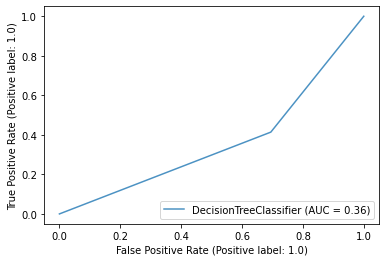

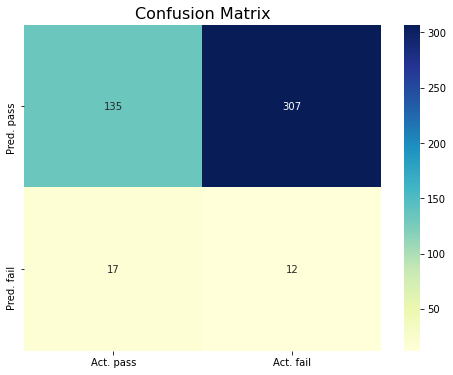

Accuracy = 0.31
Recall = 0.41



In [132]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import plot_roc_curve

model = DecisionTreeClassifier(criterion='entropy', max_depth=13)
model.fit(X4_RFE, Y1)
ax = plt.gca()
rfc_disp = plot_roc_curve(model, X5_RFE,Y2, ax=ax, alpha=0.8)
preds = model.predict(X5_RFE)
confusion_matrix_and_metrics(model,Y2, preds, X5_RFE)
plt.show()

print(f'Accuracy = {accuracy_score(Y2, preds):.2f}\nRecall = {recall_score(Y2, preds):.2f}\n')

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       442
         1.0       0.00      0.00      0.00        29

    accuracy                           0.94       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.88      0.94      0.91       471

Average Accuracy: 0.9384288747346072


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


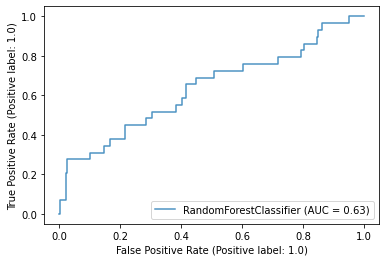

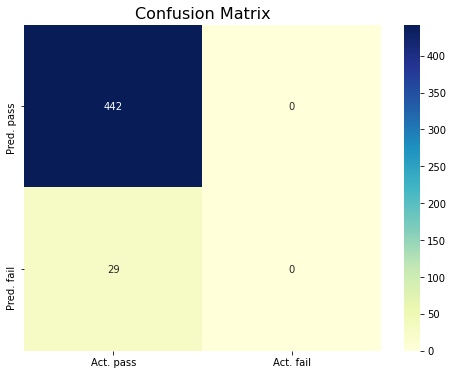

Accuracy = 0.94
Recall = 0.00



In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve

model = RandomForestClassifier(n_jobs = -1, max_depth = 5, random_state=42,)
model.fit(X4_RFE, Y1)
ax = plt.gca()
rfc_disp = plot_roc_curve(model, X5_RFE,Y2, ax=ax, alpha=0.8)
preds = model.predict(X5_RFE)
confusion_matrix_and_metrics(model,Y2, preds, X5_RFE)
plt.show()

print(f'Accuracy = {accuracy_score(Y2, preds):.2f}\nRecall = {recall_score(Y2, preds):.2f}\n')

In [149]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

In [150]:
model1 = GaussianNB()

In [151]:
model1.fit(X4_RFE, Y1)

GaussianNB()

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       442
         1.0       0.00      0.00      0.00        29

    accuracy                           0.94       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.88      0.94      0.91       471

Average Accuracy: 0.9384288747346072


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


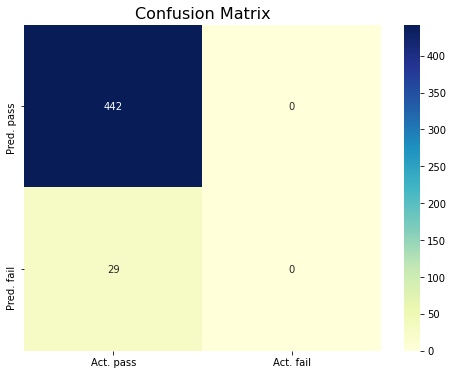

Accuracy = 0.94
Recall = 0.00



In [152]:
y_pred = model1.predict(X5_RFE)
confusion_matrix_and_metrics(model1,Y2, y_pred, X5_RFE)
plt.show()
print(f'Accuracy = {accuracy_score(Y2, y_pred):.2f}\nRecall = {recall_score(Y2, y_pred):.2f}\n')

In [153]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score( Y2, y_pred))

Accuracy: 0.9384288747346072


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       442
         1.0       0.00      0.00      0.00        29

    accuracy                           0.94       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.88      0.94      0.91       471

Average Accuracy: 0.9384288747346072


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


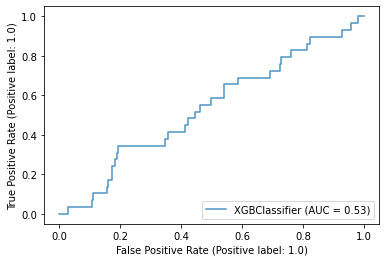

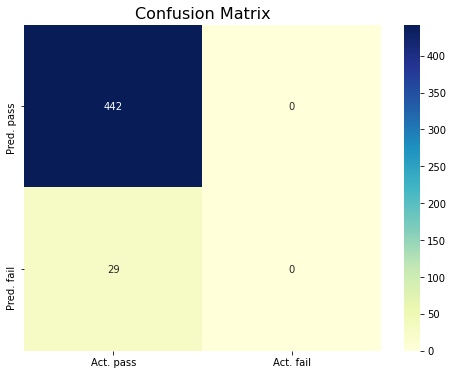

Accuracy = 0.94
Recall = 0.00



In [169]:

model = XGBClassifier(random_state=1)
model.fit(X4_RFE, Y1)
y_pred1 = model.predict(X5_RFE)
cm = confusion_matrix(X5_RFE, Y2)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [167]:
from xgboost import XGBClassifier

In [171]:
model = XGBClassifier(random_state=1)
model.fit(X4_RFE, Y1)

[01:01:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)